In [ ]:
## Unit 4 Homework Assignment: A Whale Off the Port(folio)

In [3]:
### Prepare the Data

import pandas as pd
import seaborn as sns

In [4]:
whales_df=pd.read_csv("whale_returns.csv",index_col="Date", parse_dates=True, infer_datetime_format=True)
algo_df=pd.read_csv("algo_returns.csv",index_col="Date", parse_dates=True, infer_datetime_format=True)
sp_df=pd.read_csv("sp500_historical.csv",index_col="Date", parse_dates=True, infer_datetime_format=True)

In [5]:
whales_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [6]:
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
sp_df.isnull().sum()

Close    0
dtype: int64

In [8]:
whales_df.dropna(inplace=True)
whales_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [9]:
algo_df.dropna(inplace=True)
algo_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [10]:
whales_df=whales_df.sort_index(ascending=True)
algo_df=algo_df.sort_index(ascending = True)
sp_df=sp_df.sort_index(ascending = True)

In [11]:
whales_df.sample(5)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2018-01-16,-0.005126,-0.005553,0.009646,-0.011962
2018-03-27,-0.018047,-0.005019,-0.015415,-0.024268
2018-12-11,-0.001686,-0.003164,0.000611,0.001262
2018-02-16,-0.001453,0.000613,-0.016877,0.000518
2016-04-21,-0.000545,0.006035,-0.012477,-0.008508


In [12]:
algo_df.sample(5)

,Algo 1,Algo 2
Date,,
2014-07-28,-0.008952,-0.003286
2017-02-22,-0.000979,-0.002566
2019-01-11,-0.005112,0.003885
2015-03-23,0.015172,0.001519
2017-11-24,-0.000557,0.003324


In [13]:
sp_df.sample(5)

,Close
Date,
2014-03-05,$1873.81
2014-01-07,$1837.88
2019-01-14,$2582.61
2016-03-30,$2063.95
2016-09-13,$2127.02


In [14]:
sp_df["Close"] = sp_df["Close"].str.replace("$", "").astype("float")
sp_df

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93
...,...
2019-04-16,2907.06
2019-04-17,2900.45
2019-04-18,2905.03


In [15]:
sp_daily_returns=sp_df.pct_change()

In [16]:
sp_daily_returns.rename(columns={"Close":"sp500"},inplace=True)

In [17]:
sp_daily_returns.dropna(inplace = True)
sp_daily_returns.sample(5)

,sp500
Date,
2017-12-22,-0.000458
2014-09-16,0.007484
2012-10-11,0.000195
2015-06-12,-0.006994
2013-12-03,-0.003193


In [18]:
portfolio_daily_returns=pd.concat([whales_df,algo_df,sp_daily_returns], axis="columns", join ="inner")
portfolio_daily_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944
...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579


<AxesSubplot:xlabel='Date'>

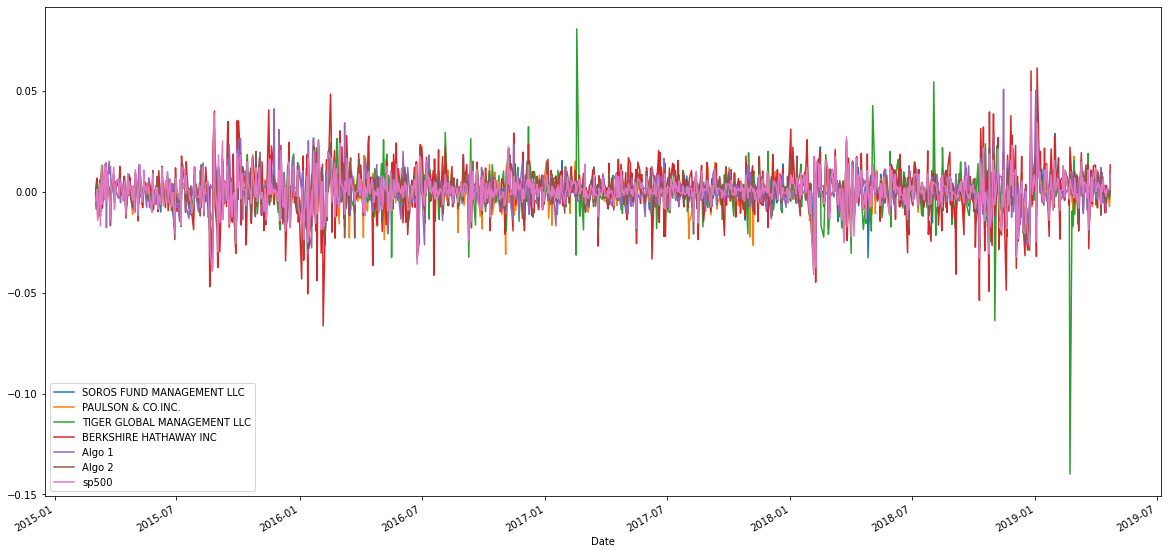

In [19]:
# Quantitative Analysis

portfolio_daily_returns.plot(kind="line",figsize = (20,10))

<AxesSubplot:xlabel='Date'>

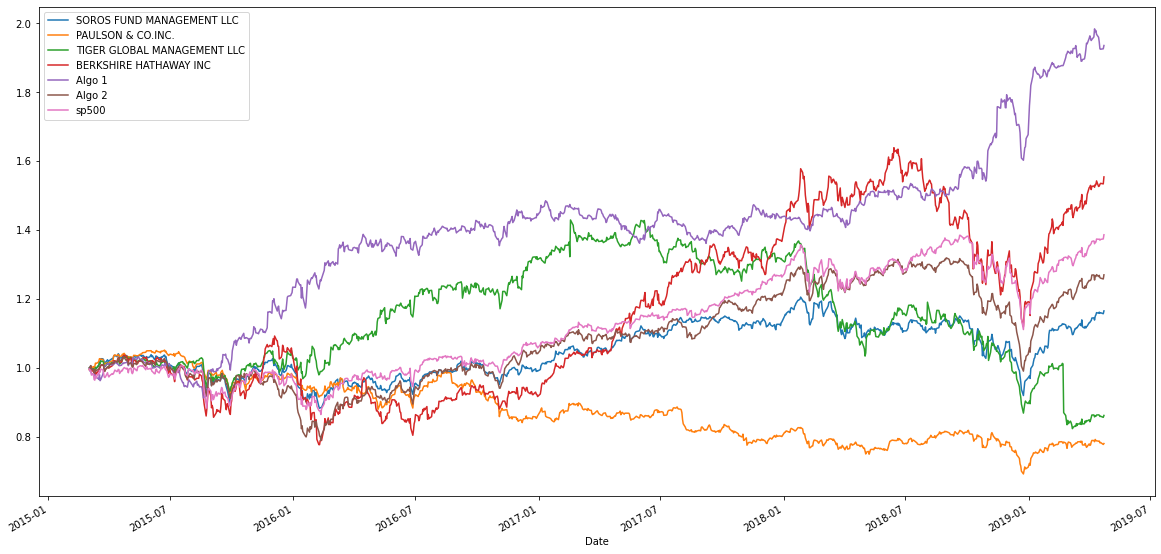

In [20]:
cum_portfolio=(1+portfolio_daily_returns).cumprod()
cum_portfolio.plot(figsize=(20,10))

In [21]:
## It seems BHI and Algo 1 had outperformed the SP500.

<AxesSubplot:>

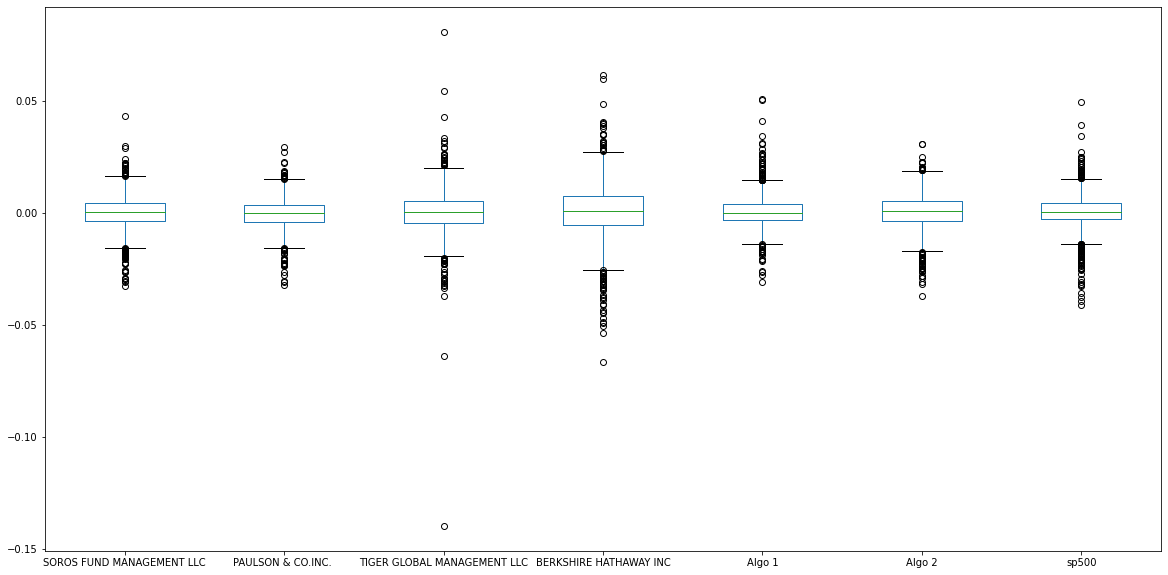

In [22]:
# Risk Analysis

portfolio_daily_returns.plot(kind="box",figsize=(20,10))

In [23]:
portfolio_std=pd.DataFrame(portfolio_daily_returns.std()).rename(columns={0:"std"})
portfolio_std

,std
SOROS FUND MANAGEMENT LLC,0.007895
PAULSON & CO.INC.,0.007023
TIGER GLOBAL MANAGEMENT LLC,0.010894
BERKSHIRE HATHAWAY INC,0.012919
Algo 1,0.007620
Algo 2,0.008342
sp500,0.008554


<AxesSubplot:>

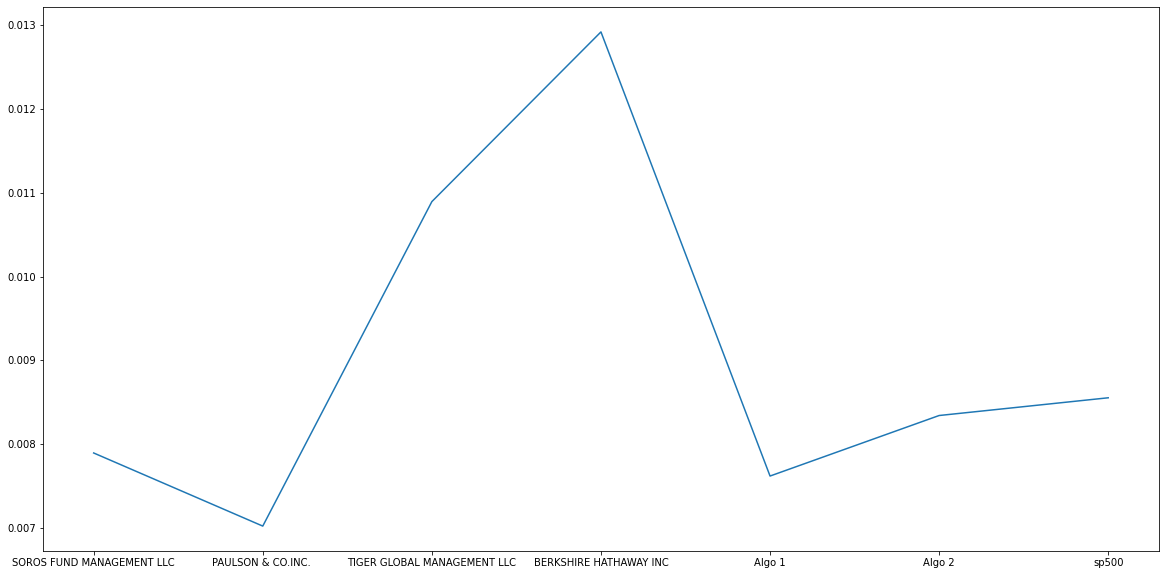

In [24]:
portfolio_daily_returns.std().plot(figsize=(20,10))

In [25]:
import numpy as np

In [26]:
riskier_std = [portfolio_std["std"] > portfolio_std.loc["sp500", "std"]]
riskier_std

[SOROS FUND MANAGEMENT LLC      False
 PAULSON & CO.INC.              False
 TIGER GLOBAL MANAGEMENT LLC     True
 BERKSHIRE HATHAWAY INC          True
 Algo 1                         False
 Algo 2                         False
 sp500                          False
 Name: std, dtype: bool]

In [27]:
annual_std=portfolio_std*np.sqrt(252)
annual_std

,std
SOROS FUND MANAGEMENT LLC,0.125335
PAULSON & CO.INC.,0.111488
TIGER GLOBAL MANAGEMENT LLC,0.172936
BERKSHIRE HATHAWAY INC,0.205077
Algo 1,0.120967
Algo 2,0.132430
sp500,0.135786


<AxesSubplot:xlabel='Date'>

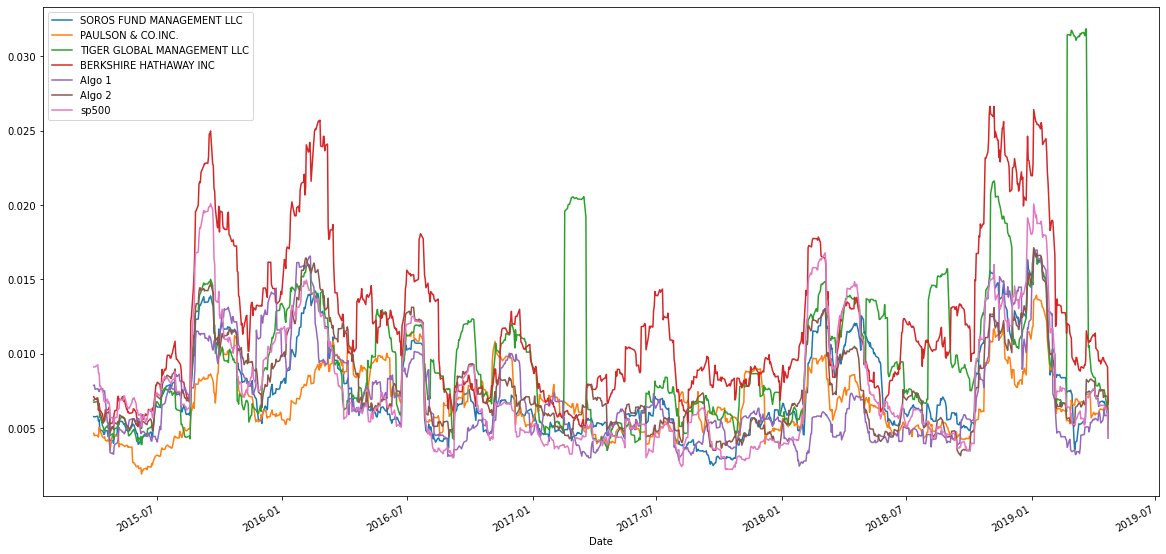

In [28]:
# Rolling Statistics

rolling_std=portfolio_daily_returns.rolling(window=21).std().plot(figsize=(20,10))
rolling_std

In [29]:
portfolio_daily_returns.corr()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
sp500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


<AxesSubplot:>

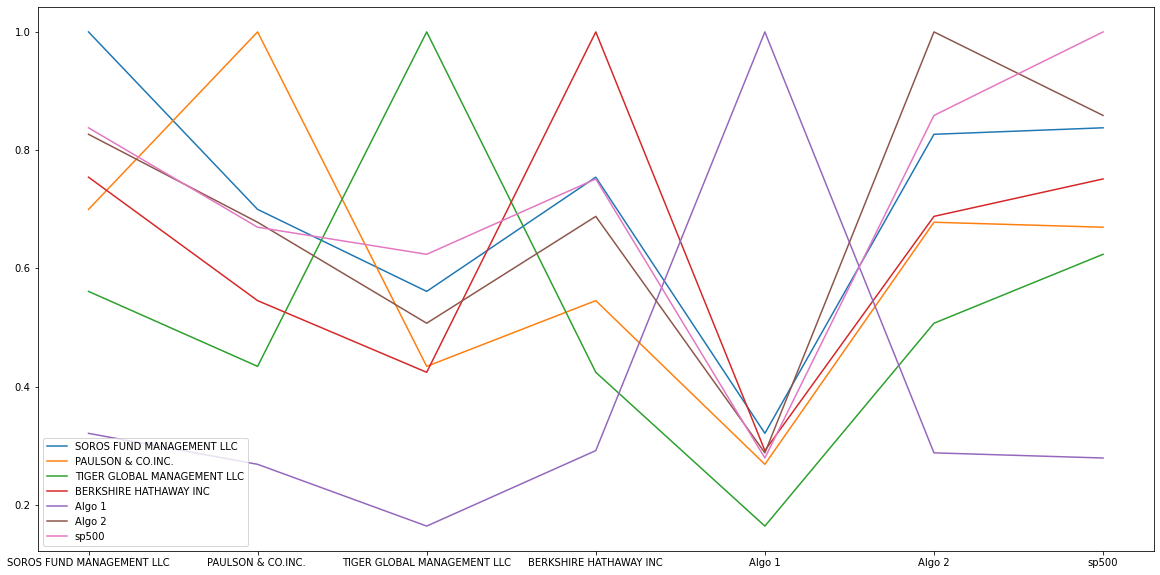

In [30]:
portfolio_corr=portfolio_daily_returns.corr().plot(figsize=(20,10))
portfolio_corr

In [31]:
## Algo 2 is the closest to mimicking the sp500

<AxesSubplot:title={'center':'Rolling 60-Day Beta of TIGER GLOBAL MANAGEMENT LLC'}, xlabel='Date'>

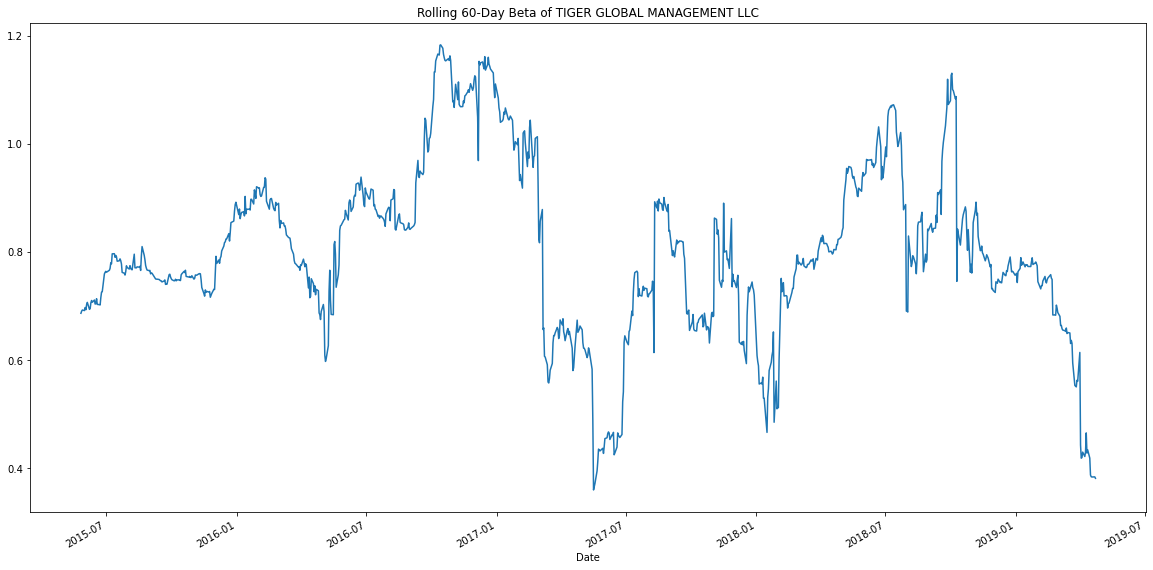

In [32]:
rolling_cov=portfolio_daily_returns['TIGER GLOBAL MANAGEMENT LLC'].rolling(window=60).cov(portfolio_daily_returns['sp500'])
rolling_var=portfolio_daily_returns['sp500'].rolling(window=60).var()
rolling_beta=rolling_cov / rolling_var
rolling_beta.plot(figsize=(20,10), title="Rolling 60-Day Beta of TIGER GLOBAL MANAGEMENT LLC")

<AxesSubplot:xlabel='Date'>

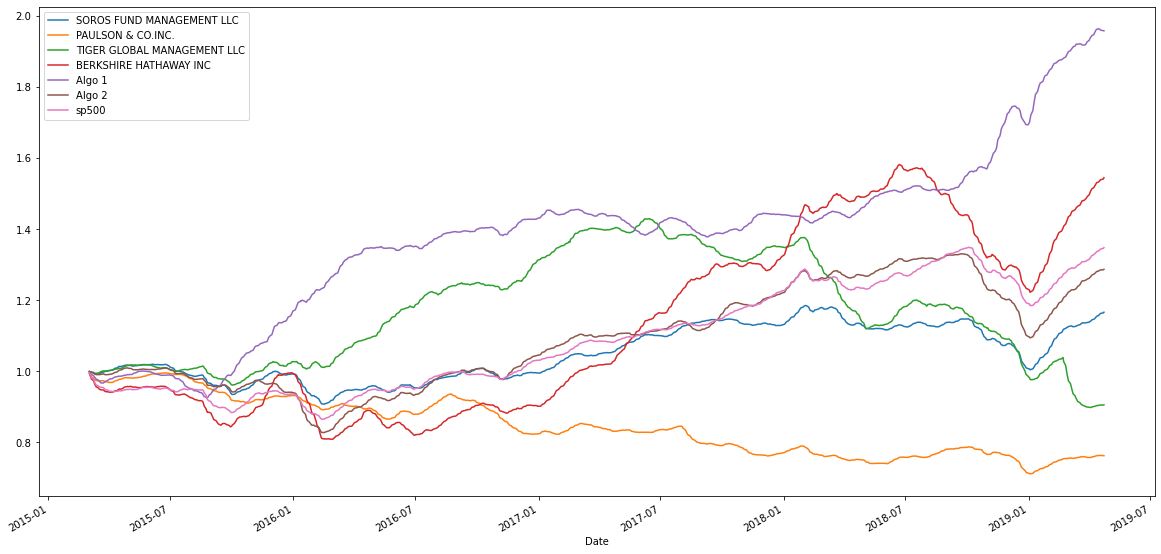

In [33]:
# Rolling Statistics Challenge: Exponentially Weighted Average

returns_ewm = portfolio_daily_returns.ewm(span = 21,adjust = False).mean()
(1+returns_ewm).cumprod().plot(figsize = (20,10))

<AxesSubplot:>

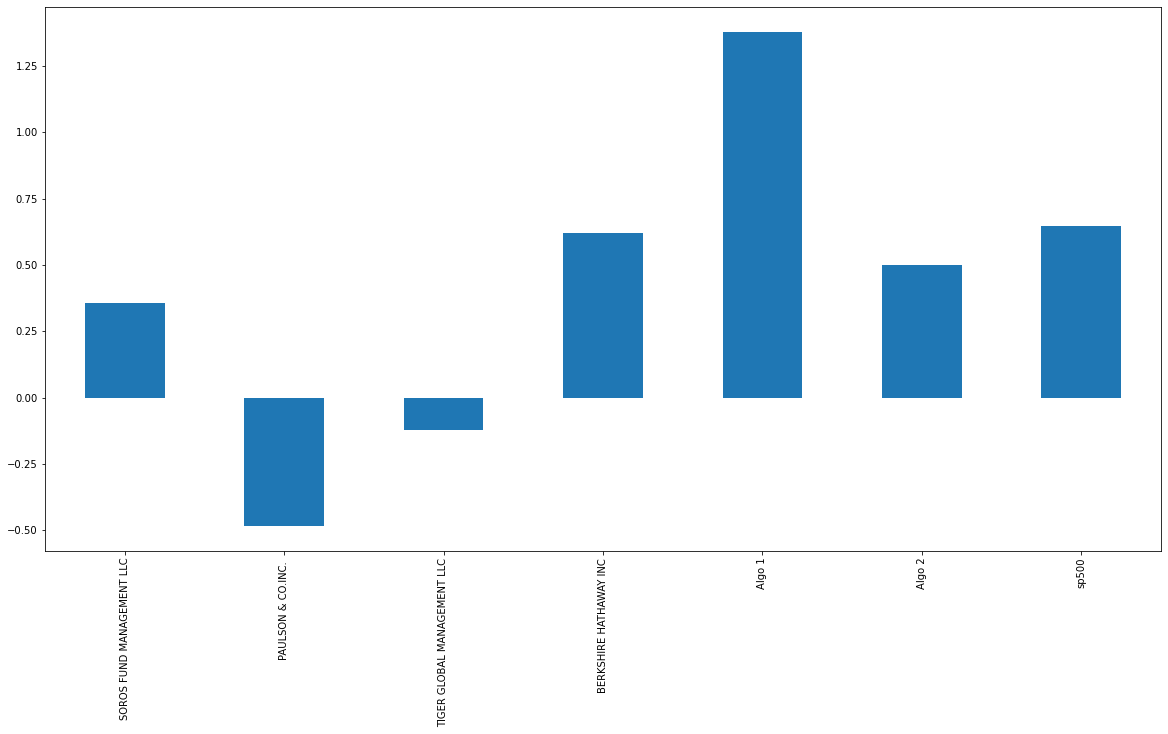

In [34]:
# Sharpe Ratios

sharpe_ratios=portfolio_daily_returns.mean()*252/(portfolio_daily_returns.std()*np.sqrt(252))
sharpe_ratios.plot(kind="bar",figsize=(20,10))

In [35]:
## Algo 1 had outperformed the sp500, but Algo 2 was just a short.

In [74]:
# Portfolio Returns

aapl=pd.read_csv("aapl_historical.csv",index_col="Trade DATE", parse_dates=True, infer_datetime_format=True)
google=pd.read_csv("goog_historical.csv",index_col="Trade DATE", parse_dates=True, infer_datetime_format=True)
costco=pd.read_csv("cost_historical.csv",index_col="Trade DATE", parse_dates=True, infer_datetime_format=True)

In [90]:
appl_dropped=aapl.drop(aapl.columns[0],axis=1)
appl_dropped.columns = ["AAPL"]

In [101]:
aapl=appl_dropped.pct_change()

In [114]:
aapl

,AAPL
Trade DATE,
2019-05-09,NaN
2019-05-08,0.010861
2019-05-07,-0.000197
2019-05-06,0.027704
2019-05-03,0.015685
...,...
2018-05-17,0.003650
2018-05-16,0.006364
2018-05-15,-0.009246


In [103]:
google_dropped=google.drop(google.columns[0],axis=1)
google_dropped.columns = ["GOOG"]
google_dropped.pct_change()

,GOOG
Trade DATE,
2019-05-09,NaN
2019-05-08,0.003347
2019-05-07,0.006714
2019-05-06,0.013023
2019-05-03,-0.003355
...,...
2018-05-17,0.011469
2018-05-16,0.002948
2018-05-15,-0.002348


In [105]:
google=google_dropped.pct_change()

In [110]:
costco_dropped=costco.drop(costco.columns[0],axis=1)
costco_dropped.columns = ["COST"]

In [116]:
costco=costco_dropped.pct_change()
costco

,COST
Trade DATE,
2019-05-09,NaN
2019-05-08,-0.008749
2019-05-07,-0.004806
2019-05-06,0.016862
2019-05-03,0.001597
...,...
2018-05-17,0.003217
2018-05-16,-0.004459
2018-05-15,-0.016255


In [144]:
portfolio3

,AAPL,GOOG,COST
Trade DATE,,,
2019-05-09,NaN,NaN,NaN
2019-05-08,0.010861,0.003347,-0.008749
2019-05-07,-0.000197,0.006714,-0.004806
2019-05-06,0.027704,0.013023,0.016862
2019-05-03,0.015685,-0.003355,0.001597
...,...,...,...
2018-05-17,0.003650,0.011469,0.003217
2018-05-16,0.006364,0.002948,-0.004459
2018-05-15,-0.009246,-0.002348,-0.016255


In [147]:
weights = [.2,.2,.2]
portfolio_returns3=portfolio3.dot(weights)
portfolio3.head

,AAPL,GOOG,COST
Trade DATE,,,
2019-05-09,NaN,NaN,NaN
2019-05-08,0.010861,0.003347,-0.008749
2019-05-07,-0.000197,0.006714,-0.004806
2019-05-06,0.027704,0.013023,0.016862
2019-05-03,0.015685,-0.003355,0.001597


In [136]:
final=pd.concat([portfolio_daily_returns,aapl,google,costco],axis="columns",join="inner")
final.reset_index()

,index,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500,AAPL,GOOG,COST
0,2018-05-11,-0.004717,0.000982,0.002624,-0.004125,0.000358,0.000281,0.001708,0.002339,-0.001763,-0.000613
1,2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884,0.009172,0.019431,0.002046
2,2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842,-0.009246,-0.002348,-0.016255
3,2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061,0.006364,0.002948,-0.004459
4,2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856,0.003650,0.011469,0.003217
...,...,...,...,...,...,...,...,...,...,...,...
233,2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,-0.019101,-0.007449,-0.000896
234,2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,-0.003581,-0.000024,-0.001017
235,2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579,-0.003276,-0.009985,0.009818
236,2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012,-0.014218,-0.012423,-0.008796


In [148]:
final_std=final.std()*np.sqrt(252)
final_std=final_std.sort_values(ascending=False)
final_std

AAPL                           0.300245
GOOG                           0.254936
BERKSHIRE HATHAWAY INC         0.246672
TIGER GLOBAL MANAGEMENT LLC    0.232069
COST                           0.215913
sp500                          0.151739
SOROS FUND MANAGEMENT LLC      0.146455
Algo 2                         0.139262
Algo 1                         0.133423
PAULSON & CO.INC.              0.116489
dtype: float64

<AxesSubplot:>

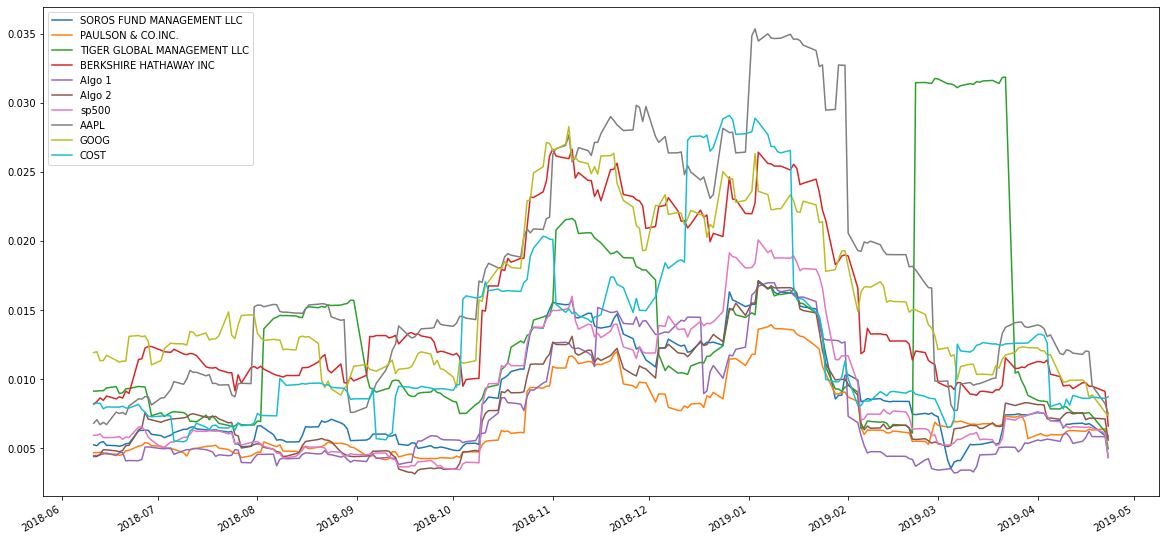

In [149]:
final.rolling(window=21).std().plot(figsize=(20,10))

In [150]:
correlation=final.corr()
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500,AAPL,GOOG,COST
SOROS FUND MANAGEMENT LLC,1.000000,0.791191,0.477722,0.816670,0.337809,0.862258,0.876089,0.025584,0.104055,0.023169
PAULSON & CO.INC.,0.791191,1.000000,0.485421,0.650499,0.361243,0.783646,0.766696,0.036797,0.073187,-0.061685
TIGER GLOBAL MANAGEMENT LLC,0.477722,0.485421,1.000000,0.325080,0.114449,0.409472,0.481095,0.012910,0.030462,0.052597
BERKSHIRE HATHAWAY INC,0.816670,0.650499,0.325080,1.000000,0.327043,0.782646,0.851968,-0.026454,0.063062,-0.017662
Algo 1,0.337809,0.361243,0.114449,0.327043,1.000000,0.365496,0.289290,0.122513,0.054127,-0.017724
Algo 2,0.862258,0.783646,0.409472,0.782646,0.365496,1.000000,0.875699,0.034272,0.112318,-0.062527
sp500,0.876089,0.766696,0.481095,0.851968,0.289290,0.875699,1.000000,0.029646,0.120870,0.025255
AAPL,0.025584,0.036797,0.012910,-0.026454,0.122513,0.034272,0.029646,1.000000,0.687005,0.432154
GOOG,0.104055,0.073187,0.030462,0.063062,0.054127,0.112318,0.120870,0.687005,1.000000,0.401170
COST,0.023169,-0.061685,0.052597,-0.017662,-0.017724,-0.062527,0.025255,0.432154,0.401170,1.000000


<AxesSubplot:>

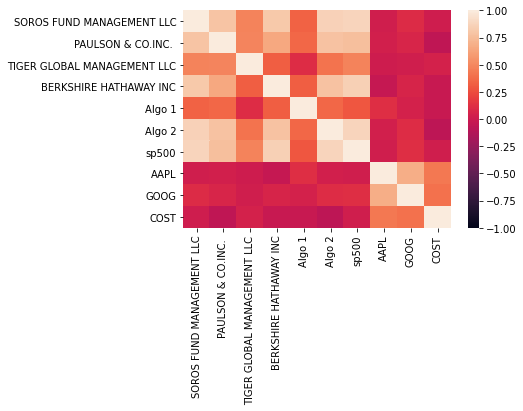

In [151]:
sns.heatmap(correlation,vmin=-1,vmax=1)

In [154]:
aapl_cov= final['AAPL'].cov(final['sp500'])
goog_cov= final['GOOG'].cov(final['sp500'])
cost_cov= final['COST'].cov(final['sp500'])
algo_cov= final['Algo 1'].cov(final['sp500'])
algo2_cov= final['Algo 2'].cov(final['sp500'])
whales_cov=final["BERKSHIRE HATHAWAY INC"].cov(final['sp500'])

In [156]:
variance = final['sp500'].var()
variance

9.136818063219147e-05

In [159]:
aapl_beta=aapl_cov / variance
goog_beta= goog_cov / variance
cost_beta= cost_cov / variance
algo_beta= algo_cov / variance
algo2_beta= algo2_cov / variance
whales_beta= whales_cov / variance

print(f'AAPL BETA = {aapl_beta}')
print(f'GOOG BETA = {goog_beta}')
print(f'COST BETA = {cost_beta}')
print(f'ALGO BETA = {algo_beta}')
print(f'ALGO_2 BETA = {algo2_beta}')
print(f'WHALES BETA = {whales_beta}')

AAPL BETA = 0.058660560123722054
GOOG BETA = 0.20307241100825188
COST BETA = 0.0359362502262466
ALGO BETA = 0.254371093936707
ALGO_2 BETA = 0.8036908417722577
WHALES BETA = 1.3849845798102673


In [161]:
correlation.sum(axis=0).sort_values()

COST                           1.774747
AAPL                           2.354427
GOOG                           2.646256
Algo 1                         2.954244
TIGER GLOBAL MANAGEMENT LLC    3.389208
BERKSHIRE HATHAWAY INC         4.772853
PAULSON & CO.INC.              4.886995
Algo 2                         5.163279
SOROS FUND MANAGEMENT LLC      5.314547
sp500                          5.316608
dtype: float64

<AxesSubplot:title={'center':'Annualized Sharpe Ratios'}>

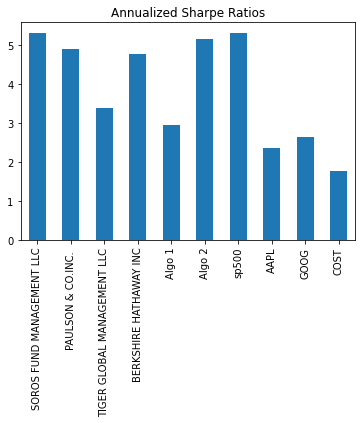

In [162]:
correlation.sum(axis=0).plot(kind="bar", title = "Annualized Sharpe Ratios")